### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries and Resnet50 

In [2]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
#replace path to training dataset
train_path = ''
#replace path to testing dataset
valid_path = ''

### Model Building:
Initializing ResNet50 library

In [4]:
# Import the ResNet50 library and excluding the output layer
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob(train_path+'/*')
folders

['/content/drive/My Drive/Projects/Bike Brand Predictor/Datasets/Train/Pulsar',
 '/content/drive/My Drive/Projects/Bike Brand Predictor/Datasets/Train/Ktm',
 '/content/drive/My Drive/Projects/Bike Brand Predictor/Datasets/Train/Royal Enfield']

In [7]:
#flatten the layer and give output layer
x = Flatten()(resnet.output)
output = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=resnet.input, outputs=output)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# compile config
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Loading the dataset

In [11]:
# Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation for train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 154 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 32 images belonging to 3 classes.


### Model Training

In [14]:
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 7s 1s/step - loss: 6.6359 - accuracy: 0.3247 - val_loss: 6.7481 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 5.3693 - accuracy: 0.2792 - val_loss: 4.2127 - val_accuracy: 0.3438
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 3.4419 - accuracy: 0.3896 - val_loss: 3.7748 - val_accuracy: 0.3438
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 3.0694 - accuracy: 0.4416 - val_loss: 1.3140 - val_accuracy: 0.6250
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 1.8954 - accuracy: 0.4481 - val_loss: 2.5039 - val_accuracy: 0.5625
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 1.7584 - accuracy: 0.5519 - val_loss: 1.6939 - val_accuracy: 0.5000
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 1.2656 - accuracy: 0.5195 - val_loss: 1.7842 - val_accuracy: 0.5625
Epoch 8/50
5/5 [==============================] - 6s

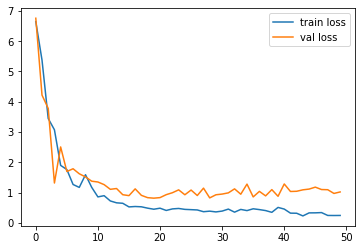

<Figure size 432x288 with 0 Axes>

In [15]:
#base path to save models and graphs
save_path = ''

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig(save_path+'/LossVal_loss')

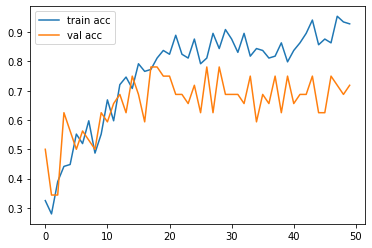

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig(save_path+'/AccVal_acc')

### Model Saving

In [18]:
#Model Prediction
y_pred = model.predict(test_set)
y_pred

array([[9.9269944e-01, 7.1258838e-03, 1.7466869e-04],
       [6.3650477e-01, 3.5111648e-01, 1.2378707e-02],
       [4.3807027e-01, 6.1301108e-02, 5.0062865e-01],
       [9.9656111e-01, 3.3659718e-03, 7.2981682e-05],
       [2.6320030e-03, 9.9736661e-01, 1.4667244e-06],
       [5.7610080e-02, 8.7610060e-01, 6.6289298e-02],
       [9.9336571e-01, 6.6074263e-03, 2.6939264e-05],
       [1.7670120e-01, 1.9207932e-01, 6.3121945e-01],
       [9.7990787e-01, 1.9781204e-02, 3.1092495e-04],
       [8.8512254e-01, 9.6564412e-02, 1.8313002e-02],
       [4.5930767e-03, 8.1481256e-02, 9.1392565e-01],
       [4.8522055e-02, 9.4520462e-01, 6.2733414e-03],
       [1.8930607e-01, 6.0713422e-01, 2.0355973e-01],
       [3.4190536e-02, 9.1630435e-01, 4.9505156e-02],
       [1.3154118e-01, 1.9405030e-02, 8.4905380e-01],
       [2.0905644e-02, 3.3308223e-01, 6.4601213e-01],
       [6.5140468e-01, 3.4760782e-01, 9.8752079e-04],
       [1.6644700e-01, 7.3187631e-01, 1.0167666e-01],
       [1.3746974e-02, 1.479

In [19]:
# import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 1, 1])

### Model Prediction

* In app.py file, load the saved model.
* Run app.py file to make predictions